In [38]:
#importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [39]:
#getting data 
insurance = pd.read_csv('insurance.csv')
print(insurance)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [40]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [41]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
print(insurance['sex'].value_counts())
print(insurance['smoker'].value_counts(),insurance['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [43]:
x = insurance.iloc[:,:-1].values
y = insurance.iloc[:,-1].values
y_conc = y.copy()

print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [44]:
!pip install scikit-learn

In [45]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

x[:, 1] = labelencoder.fit_transform(x[:, 1])
x[:, 4] = labelencoder.fit_transform(x[:, 4])
x[:, 5] = labelencoder.fit_transform(x[:, 5])
print(x[:, 1])
print(x[:, 4])
print(x[:, 5])
# print(x)
insurance1 = pd.DataFrame(x)
print(insurance1.to_string)
print(y)


[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]
<bound method DataFrame.to_string of        0  1       2  3  4  5
0     19  0    27.9  0  1  3
1     18  1   33.77  1  0  2
2     28  1    33.0  3  0  2
3     33  1  22.705  0  0  1
4     32  1   28.88  0  0  1
...   .. ..     ... .. .. ..
1333  50  1   30.97  3  0  1
1334  18  0   31.92  0  0  0
1335  18  0   36.85  0  0  2
1336  21  0    25.8  0  0  3
1337  61  0   29.07  0  1  1

[1338 rows x 6 columns]>
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# print(x_train)
# print(x_test)


In [48]:
# x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
rfr = RandomForestRegressor(n_estimators = 49 , random_state = 0)
rfr.fit(x_train,y_train)
predictions = rfr.predict(x_test)
# print(y_test)


In [49]:
print("TRAINING SET PREDICTION SCORE :",rfr.score(x_train, y_train))
print("TESTING SET PREDICTION SCORE  :",rfr.score(x_test, y_test))



TRAINING SET PREDICTION SCORE : 0.9757978901986796
TESTING SET PREDICTION SCORE  : 0.8301413522510416


In [50]:
sample_id = 11
print('ACTUAL CHARGES                : %.2f' % y_test[sample_id])
# print('Linear Regression Prediction : %.2f' % lr_predict[sample_id])
print('RANDOM FOREST PREDICTION      : %.2f' % predictions[sample_id])


ACTUAL CHARGES                : 11538.42
RANDOM FOREST PREDICTION      : 12933.20


In [51]:
#MODEL EVALUATION
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
# print(x_train)
# print(x_test)

In [53]:
# x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size = 0.25 ,random_state = 1)
rfr = RandomForestRegressor(n_estimators = 49 , random_state = 0)
rfr.fit(x_train,y_train)
predictions = rfr.predict(x_test)
# print(y_test)

In [54]:
print("TRAINING SET PREDICTION SCORE :",rfr.score(x_train, y_train))
print("TESTING SET PREDICTION SCORE  :",rfr.score(x_test, y_test))

TRAINING SET PREDICTION SCORE : 0.9757978901986796
TESTING SET PREDICTION SCORE  : 0.8301413522510416


In [55]:
sample_id = 11
print('ACTUAL CHARGES                : %.2f' % y_test[sample_id])
# print('Linear Regression Prediction : %.2f' % lr_predict[sample_id])
print('RANDOM FOREST PREDICTION      : %.2f' % predictions[sample_id])


ACTUAL CHARGES                : 11538.42
RANDOM FOREST PREDICTION      : 12933.20


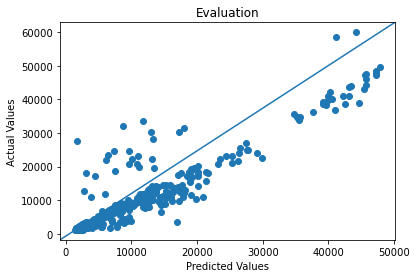

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
plt.scatter(predictions, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Evaluation")
plt.show()